## Summary

This jupyter notebook looks at popularity of songs on spotify and user curated playlists. How is engagement distributed, and are there differences by playlist class, genre, gender, or label?

We mainly look at track and artist popularity at point of addition to the playlist.

In [16]:
import pandas as pd
import numpy as np
import os, re
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from analysis_utils import get_num_appearances, get_all_entries, gini, track_concentration_ratio

### Summary statitiscs

#### Track popularity

In [9]:
df_all_tracks = get_all_entries('spotify_curated', ['track_id', 'track_popularity'])

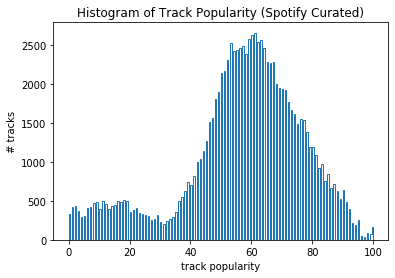

In [11]:
n, bins, patches = plt.hist(x=np.float64(df_all_tracks[['track_popularity']]), bins=200, histtype='step')
plt.title('Histogram of Track Popularity (Spotify Curated)')
plt.xlabel('track popularity')
plt.ylabel('# tracks')
plt.savefig('track_pop_hist_scl.png', bbox_inches = 'tight')

In [5]:
print('Mean spotify curated track popularity: %f' % (np.mean(df_all_tracks[['track_popularity']])))
print('Std spotify curated track popularity: %f' % (np.std(df_all_tracks[['track_popularity']])))

Mean spotify curated track popularity: 56.648150
Std spotify curated track popularity: 20.259215


In [223]:
df_tracks_unique = df_all_tracks.drop_duplicates(['track_id'])

print('Gini coefficient for spotify curated track popularity: %f' % 
      (gini(np.array(df_tracks_unique[['track_popularity']]).squeeze())))

Gini coefficient for spotify curated track popularity: 0.200020


In [12]:
df_all_tracks = get_all_entries('user_curated', ['track_id', 'track_popularity'])

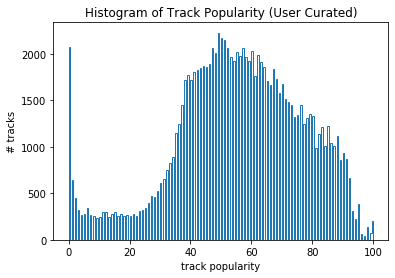

In [13]:
n, bins, patches = plt.hist(x=np.float64(df_all_tracks[['track_popularity']]), bins=200, histtype='step')
plt.title('Histogram of Track Popularity (User Curated)')
plt.xlabel('track popularity')
plt.ylabel('# tracks')
plt.savefig('track_pop_hist_ucl.png', bbox_inches = 'tight')

In [24]:
print('Mean user curated track popularity: %f' % (np.mean(df_all_tracks[['track_popularity']])))
print('Std user curated track popularity: %f' % (np.std(df_all_tracks[['track_popularity']])))

Mean user curated track popularity: 54.974085
Std user curated track popularity: 21.574930


In [229]:
df_tracks_unique = df_all_tracks.drop_duplicates(['track_id'])

print('Gini coefficient for user curated track popularity: %f' % 
      (gini(np.array(df_tracks_unique[['track_popularity']]).squeeze())))

Gini coefficient for user curated track popularity: 0.260469


#### Artist popularity

In [21]:
df_all_artists = get_all_entries('spotify_curated', ['artist_id', 'artist_popularity'])

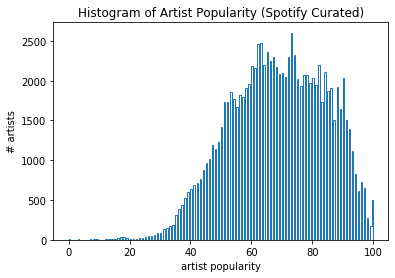

In [22]:
n, bins, patches = plt.hist(x=np.float64(df_all_artists[['artist_popularity']]), bins=200, histtype='step')
plt.title('Histogram of Artist Popularity (Spotify Curated)')
plt.xlabel('artist popularity')
plt.ylabel('# artists')
plt.savefig('artist_pop_hist_scl.png', bbox_inches = 'tight')

In [10]:
print('Mean spotify curated artist popularity: %f' % (np.mean(df_all_artists[['artist_popularity']])))
print('Std spotify curated artist popularity: %f' % (np.std(df_all_artists[['artist_popularity']])))

Mean spotify curated artist popularity: 68.435715
Std spotify curated artist popularity: 15.713124


In [239]:
df_artist_unique = df_all_artists.drop_duplicates(['artist_id'])

print('Gini coefficient for user curated artist popularity: %f' % 
      (gini(np.array(df_artist_unique[['artist_popularity']]).squeeze())))

Gini coefficient for user curated artist popularity: 0.144188


In [23]:
df_all_artists = get_all_entries('user_curated', ['artist_id', 'artist_popularity'])

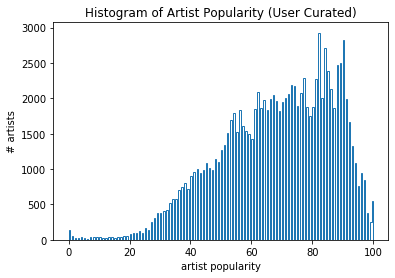

In [24]:
n, bins, patches = plt.hist(x=np.float64(df_all_artists[['artist_popularity']]), bins=200, histtype='step')
plt.title('Histogram of Artist Popularity (User Curated)')
plt.xlabel('artist popularity')
plt.ylabel('# artists')
plt.savefig('artist_pop_hist_ucl.png', bbox_inches = 'tight')

In [16]:
print('Mean user curated artist popularity: %f' % (np.mean(df_all_artists[['artist_popularity']])))
print('Std user curated artist popularity: %f' % (np.std(df_all_artists[['artist_popularity']])))

Mean user curated artist popularity: 68.074498
Std user curated artist popularity: 18.367282


In [237]:
df_artist_unique = df_all_artists.drop_duplicates(['artist_id'])

print('Gini coefficient for user curated artist popularity: %f' % 
      (gini(np.array(df_artist_unique[['artist_popularity']]).squeeze())))

Gini coefficient for user curated artist popularity: 0.215914


### Track popularity at point of addition

#### Spotify curated

In [2]:
rootdir = '../spotify_data/playlist_tracks/spotify_curated/'

dfs_all_spotify = []
for playlist in os.listdir(rootdir):
    if not os.path.isdir(rootdir + '/' + playlist): continue

    for file in os.listdir(rootdir + '/' + playlist + '/additions_and_removals'):
        filepath = rootdir + '/' + playlist + '/additions_and_removals/' + file
        if os.path.isdir(filepath): continue
        
        # check that this is a csv of additions
        test = re.search('add\.csv', file)
        if not test:
            continue
        
        dfs_all_spotify.append(pd.read_csv(filepath)[['track_id', 'track_popularity', 'artist_id','artist_popularity']])

df_spotify_add = pd.concat(dfs_all_spotify)

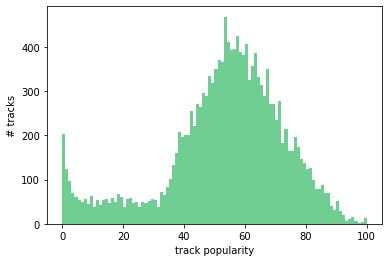

In [20]:
n, bins, patches = plt.hist(x=np.float64(df_spotify_add[['track_popularity']]), 
                            bins=100, color='#71CE92', histtype='stepfilled')
plt.title('Histogram of Track Popularity at Addition (Spotify Curated)')
plt.xlabel('track popularity')
plt.ylabel('# tracks')
plt.savefig('track_add_pop_hist_scl.png', bbox_inches = 'tight')

In [113]:
print('Mean spotify curated track popularity: %f' % (np.mean(df_spotify_add[['track_popularity']])))
print('Std spotify curated track popularity: %f' % (np.std(df_spotify_add[['track_popularity']])))

Mean spotify curated track popularity: 52.894346
Std spotify curated track popularity: 19.669207


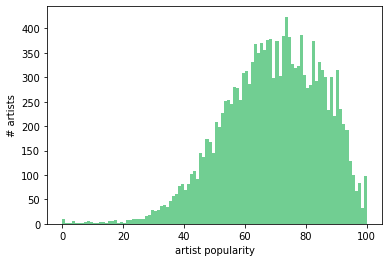

In [21]:
n, bins, patches = plt.hist(x=np.float64(df_spotify_add[['artist_popularity']]),
                            bins=100, color='#71CE92', histtype='stepfilled')
plt.title('Histogram of Artist Popularity at Addition (Spotify Curated)')
plt.xlabel('artist popularity')
plt.ylabel('# artists')
plt.savefig('artist_add_pop_hist_scl.png', bbox_inches = 'tight')

In [115]:
print('Mean spotify curated artist popularity: %f' % (np.mean(df_all_artists[['artist_popularity']])))
print('Std spotify curated artist popularity: %f' % (np.std(df_all_artists[['artist_popularity']])))

Mean spotify curated artist popularity: 68.074498
Std spotify curated artist popularity: 18.367282


#### User curated

In [29]:
rootdir = '../spotify_data/playlist_tracks/user_curated/'

dfs_all_user = []
for playlist in os.listdir(rootdir):
    if not os.path.isdir(rootdir + '/' + playlist): continue

    for file in os.listdir(rootdir + '/' + playlist + '/additions_and_removals'):
        filepath = rootdir + '/' + playlist + '/additions_and_removals/' + file
        if os.path.isdir(filepath): continue
        
        # check that this is a csv of additions
        test = re.search('add\.csv', file)
        if not test:
            continue
        
        dfs_all_user.append(pd.read_csv(filepath)[['track_id', 'track_popularity', 'artist_id','artist_popularity']])

df_user_add = pd.concat(dfs_all_user)

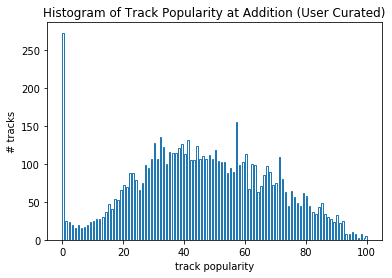

In [36]:
n, bins, patches = plt.hist(x=np.float64(df_user_add[['track_popularity']]), bins=200, histtype='step')
plt.title('Histogram of Track Popularity at Addition (User Curated)')
plt.xlabel('track popularity')
plt.ylabel('# tracks')
plt.savefig('track_add_pop_hist_ucl.png', bbox_inches = 'tight')

In [108]:
print('Mean user curated track popularity: %f' % (np.mean(df_user_add[['track_popularity']])))
print('Std user curated track popularity: %f' % (np.std(df_user_add[['track_popularity']])))

Mean user curated track popularity: 45.681631
Std user curated track popularity: 22.399535


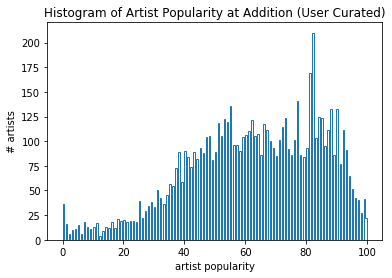

In [283]:
n, bins, patches = plt.hist(x=np.float64(df_user_add[['artist_popularity']]), bins=200, histtype='step')
plt.title('Histogram of Artist Popularity at Addition (User Curated)')
plt.xlabel('artist popularity')
plt.ylabel('# artists')
plt.savefig('artist_add_pop_hist_ucl.png', bbox_inches = 'tight')

In [110]:
print('Mean spotify curated artist popularity: %f' % (np.mean(df_user_add[['artist_popularity']])))
print('Std spotify curated artist popularity: %f' % (np.std(df_user_add[['artist_popularity']])))

Mean spotify curated artist popularity: 62.376151
Std spotify curated artist popularity: 21.873336


### Track vs. Artist popularity

Text(0, 0.5, 'Track Popularity')

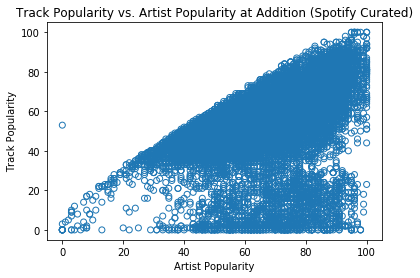

In [48]:
plt.scatter(np.float64(df_spotify_add[['artist_popularity']]),
            np.float64(df_spotify_add[['track_popularity']]),
            facecolors='none', edgecolors='C0')
plt.title('Track Popularity vs. Artist Popularity at Addition (Spotify Curated)')
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')

Text(0, 0.5, 'Track Popularity')

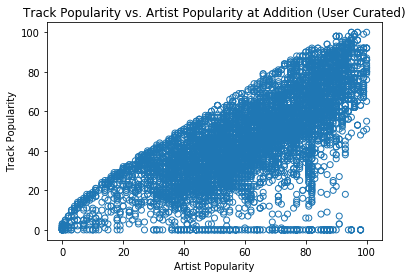

In [49]:
plt.scatter(np.float64(df_user_add[['artist_popularity']]),
            np.float64(df_user_add[['track_popularity']]),
            facecolors='none', edgecolors='C0')
plt.title('Track Popularity vs. Artist Popularity at Addition (User Curated)')
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')

### Track vs. Artist popularity with only songs that appear >10 times 

In [22]:
min_appearances = 10

#### Spotify curated

In [23]:
df_all_spotify = get_all_entries('spotify_curated',['track_id', 'track_popularity', 'artist_id','artist_popularity'])

In [24]:
# filter for tracks with more than min_appearances appearances
df_spotify_track_count = df_all_spotify.groupby('track_id').count()\
    .reset_index()
df_spotify_track_count = df_spotify_track_count[df_spotify_track_count['artist_id'] > min_appearances]

df_spotify_add_fil = df_spotify_track_count.merge(df_spotify_add, on=['track_id'], how='left')
df_spotify_add_fil.dropna(inplace=True)

In [25]:
# concentration ratio of tracks that appear
spotify_CR = track_concentration_ratio(
    df_spotify_add_fil.drop_duplicates(['track_id']), df_all_spotify)
print('Concentration ratio of overlapping songs across spotify tracks: %f' 
    % spotify_CR)

Concentration ratio of overlapping songs across spotify tracks: 0.395246


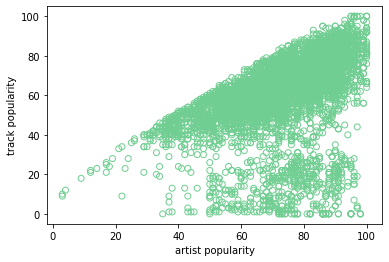

In [26]:
plt.scatter(np.float64(df_spotify_add_fil[['artist_popularity_y']]),
            np.float64(df_spotify_add_fil[['track_popularity_y']]),
            facecolors='none', edgecolors='#71CE92')
plt.title('Track Popularity vs. Artist Popularity at Addition \n'
          '(Spotify Curated, filtered for >%d appearances)' % min_appearances)
plt.xlabel('artist popularity')
plt.ylabel('track popularity')
plt.savefig('track_vs_artist_pop_scl.png', bbox_inches = 'tight')

#### User curated

In [27]:
df_all_user = get_all_entries('user_curated',['track_id', 'track_popularity', 'artist_id','artist_popularity'])

In [30]:
# filter for tracks with more than min_appearances appearances
df_user_track_count = df_all_user.groupby('track_id').count()\
    .reset_index()
df_user_track_count = df_user_track_count[df_user_track_count['artist_id'] > min_appearances]

df_user_add_fil = df_user_track_count.merge(df_user_add, on=['track_id'], how='left')
df_user_add_fil.dropna(inplace=True)

In [31]:
# concentration ratio of tracks that appear
user_CR = track_concentration_ratio(
    df_user_add_fil.drop_duplicates(['track_id']), df_all_user)
print('Concentration ratio of overlapping songs across user tracks: %f' 
    % user_CR)

Concentration ratio of overlapping songs across user tracks: 0.283543


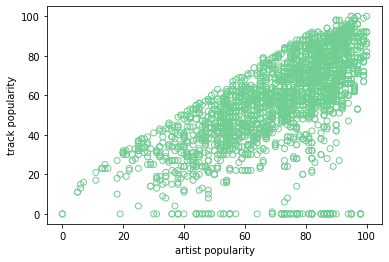

In [32]:
plt.scatter(np.float64(df_user_add_fil[['artist_popularity_y']]),
            np.float64(df_user_add_fil[['track_popularity_y']]),
            facecolors='none', edgecolors='#71CE92')
plt.title('Track Popularity vs. Artist Popularity at Addition \n'
          '(User Curated, filtered for >%d appearances)' % min_appearances)
plt.xlabel('artist popularity')
plt.ylabel('track popularity')
plt.savefig('track_vs_artist_pop_ucl.png', bbox_inches = 'tight')

### Why are there SCL tracks with low track popularity but high artist popularity?

### How does popularity affect time until addition?

#### Spotify curated

In [33]:
# get additions
rootdir = '../spotify_data/playlist_tracks/spotify_curated/'

dfs_all_spotify = []
for playlist in os.listdir(rootdir):
    if not os.path.isdir(rootdir + '/' + playlist): continue

    for file in os.listdir(rootdir + '/' + playlist + '/additions_and_removals'):
        filepath = rootdir + '/' + playlist + '/additions_and_removals/' + file
        if os.path.isdir(filepath): continue
        
        # check that this is a csv of additions
        test = re.search('add\.csv', file)
        if not test:
            continue
        
        dfs_all_spotify.append(pd.read_csv(filepath)
                               [['track_id', 'track_popularity', 'artist_id','artist_popularity',
                                'date_added', 'release_date',]])

df_spotify_add = pd.concat(dfs_all_spotify)

In [34]:
def to_datetime(x):
    x = str(x)
    if len(x) > 7:
        x = datetime.strptime(x[:10], '%Y-%m-%d')
    elif len(x) == 7:
        x = datetime.strptime(x, '%Y-%m')
    elif len(x) == 4:
        x = datetime.strptime(x, '%Y')
    return x

In [35]:
# convert strings to datetime and find difference
df_spotify_add['date_added'] = \
    df_spotify_add['date_added'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
df_spotify_add['release_date'] = \
    df_spotify_add['release_date'].\
        apply(lambda x: to_datetime(x))
df_spotify_add['date_diff'] = \
    df_spotify_add['date_added'] - df_spotify_add['release_date']
df_spotify_add['date_diff'] = df_spotify_add['date_diff'].apply(lambda x: x.days)

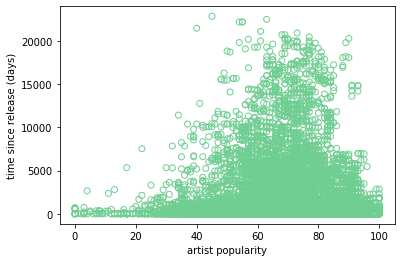

In [36]:
plt.scatter(np.float64(df_spotify_add[['artist_popularity']]),
            np.float64(df_spotify_add[['date_diff']]),
            facecolors='none', edgecolors='#71CE92')
plt.title('Time Before Track Addition vs. Artist Popularity\n'
          '(Spotify Curated)')
plt.xlabel('artist popularity')
plt.ylabel('time since release (days)')
plt.savefig('time_diff_vs_artist_pop_scl.png', bbox_inches = 'tight')

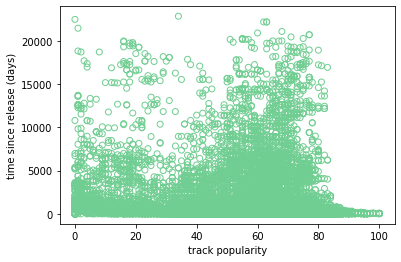

In [37]:
plt.scatter(np.float64(df_spotify_add[['track_popularity']]),
            np.float64(df_spotify_add[['date_diff']]),
            facecolors='none', edgecolors='#71CE92')
plt.title('Time Before Track Addition vs. Track Popularity\n'
          '(Spotify Curated)')
plt.xlabel('track popularity')
plt.ylabel('time since release (days)')
plt.savefig('time_diff_vs_track_pop_scl.png', bbox_inches = 'tight')

#### User curated

In [38]:
rootdir = '../spotify_data/playlist_tracks/user_curated/'

dfs_all_user = []
for playlist in os.listdir(rootdir):
    if not os.path.isdir(rootdir + '/' + playlist): continue

    for file in os.listdir(rootdir + '/' + playlist + '/additions_and_removals'):
        filepath = rootdir + '/' + playlist + '/additions_and_removals/' + file
        if os.path.isdir(filepath): continue
        
        # check that this is a csv of additions
        test = re.search('add\.csv', file)
        if not test:
            continue
        
        dfs_all_user.append(pd.read_csv(filepath)
                               [['track_id', 'track_popularity', 'artist_id','artist_popularity',
                                'date_added', 'release_date',]])
df_user_add = pd.concat(dfs_all_user)

In [39]:
# convert strings to datetime and find difference
df_user_add['date_added'] = \
    df_user_add['date_added'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
df_user_add['release_date'] = \
    df_user_add['release_date'].\
        apply(lambda x: to_datetime(x))
df_user_add['date_diff'] = \
    df_user_add['date_added'] - df_user_add['release_date']
df_user_add['date_diff'] = df_user_add['date_diff'].apply(lambda x: x.days)

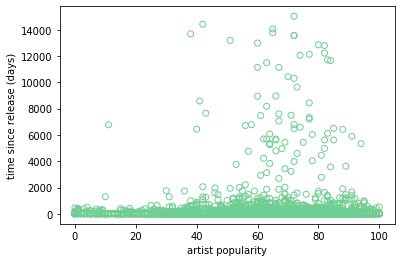

In [40]:
plt.scatter(np.float64(df_user_add[['artist_popularity']]),
            np.float64(df_user_add[['date_diff']]),
            facecolors='none', edgecolors='#71CE92')
plt.title('Time Before Track Addition vs. Artist Popularity\n'
          '(User Curated)')
plt.xlabel('artist popularity')
plt.ylabel('time since release (days)')
plt.savefig('time_diff_vs_artist_pop_ucl.png', bbox_inches = 'tight')

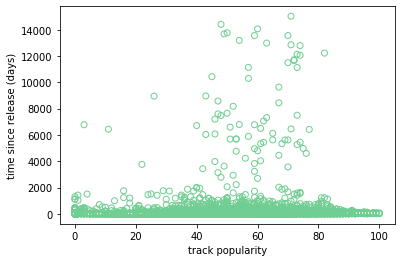

In [41]:
plt.scatter(np.float64(df_user_add[['track_popularity']]),
            np.float64(df_user_add[['date_diff']]),
            facecolors='none', edgecolors='#71CE92')
plt.title('Time Before Track Addition vs. Track Popularity\n'
          '(User Curated)')
plt.xlabel('track popularity')
plt.ylabel('time since release (days)')
plt.savefig('time_diff_vs_track_pop_ucl.png', bbox_inches = 'tight')

In [282]:
df_user_add[['date_diff']].mean()

date_diff    138.430676
dtype: float64

### Which lists are adding such old songs?

In [269]:
min_time_since_release = 200

In [270]:
# get additions
rootdir = '../spotify_data/playlist_tracks/spotify_curated/'

dfs_all_spotify = []
for playlist in os.listdir(rootdir):
    if not os.path.isdir(rootdir + '/' + playlist): continue

    for file in os.listdir(rootdir + '/' + playlist + '/additions_and_removals'):
        filepath = rootdir + '/' + playlist + '/additions_and_removals/' + file
        if os.path.isdir(filepath): continue
        
        # check that this is a csv of additions
        test = re.search('add\.csv', file)
        if not test:
            continue
        
        df_temp = pd.read_csv(filepath)[['track_id', 'track_popularity', 'artist_id',
                                         'artist_popularity',
                                         'date_added', 'release_date',]]
        
        df_temp['playlist_name'] = playlist
        dfs_all_spotify.append(df_temp)

df_spotify_add = pd.concat(dfs_all_spotify)

In [271]:
# convert strings to datetime and find difference
df_spotify_add['date_added'] = \
    df_spotify_add['date_added'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
df_spotify_add['release_date'] = \
    df_spotify_add['release_date'].\
        apply(lambda x: to_datetime(x))
df_spotify_add['date_diff'] = \
    df_spotify_add['date_added'] - df_spotify_add['release_date']
df_spotify_add['date_diff'] = df_spotify_add['date_diff'].apply(lambda x: x.days)

In [281]:
df_spotify_add_fil = df_spotify_add[df_spotify_add['date_diff'] > min_time_since_release]
print('# additions of 200+ day old songs: %d' % len(df_spotify_add_fil))
print('# playlists adding 200+ day old songs: %d' % 
      len(df_spotify_add_fil.drop_duplicates(['playlist_name'])))

# additions of 200+ day old songs: 8101
# playlists adding 200+ day old songs: 64


#### User curated

In [274]:
rootdir = '../spotify_data/playlist_tracks/user_curated/'

dfs_all_user = []
for playlist in os.listdir(rootdir):
    if not os.path.isdir(rootdir + '/' + playlist): continue

    for file in os.listdir(rootdir + '/' + playlist + '/additions_and_removals'):
        filepath = rootdir + '/' + playlist + '/additions_and_removals/' + file
        if os.path.isdir(filepath): continue
        
        # check that this is a csv of additions
        test = re.search('add\.csv', file)
        if not test:
            continue
        
        df_temp = pd.read_csv(filepath)[['track_id', 'track_popularity', 'artist_id',
                                         'artist_popularity',
                                         'date_added', 'release_date',]]
        
        df_temp['playlist_name'] = playlist
        dfs_all_user.append(df_temp)
        
df_user_add = pd.concat(dfs_all_user)

In [276]:
# convert strings to datetime and find difference
df_user_add['date_added'] = \
    df_user_add['date_added'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
df_user_add['release_date'] = \
    df_user_add['release_date'].\
        apply(lambda x: to_datetime(x))
df_user_add['date_diff'] = \
    df_user_add['date_added'] - df_user_add['release_date']
df_user_add['date_diff'] = df_user_add['date_diff'].apply(lambda x: x.days)

In [280]:
df_user_add_fil = df_user_add[df_user_add['date_diff'] > min_time_since_release]
print('# additions of 200+ day old songs: %d' % len(df_user_add_fil))
print('# playlists adding 200+ day old songs: %d' % 
      len(df_user_add_fil.drop_duplicates(['playlist_name'])))

# additions of 200+ day old songs: 579
# playlists adding 200+ day old songs: 64


### Men vs. Women at point of addition

In [186]:
all_artists = pd.read_csv('../spotify_data/all_unique_artist_with_labels.csv')
all_artists.drop_duplicates(['artist_id'])\
    .dropna(subset=['gender'])

df_spotify_add_gender = df_all_spotify.merge(all_artists[['artist_id','gender']], on=['artist_id'], how='left')\
    .dropna(subset=['gender'])

In [190]:
df_add_women = df_spotify_add_gender[df_spotify_add_gender['gender'] == 0]
print('Number of entries from women: %d' % len(df_add_women))
df_add_men = df_spotify_add_gender[df_spotify_add_gender['gender'] == 1]
print('Number of entries from men: %d' % len(df_add_men))

Number of entries from women: 23557
Number of entries from men: 77072


In [192]:
print('Mean spotify curated women track popularity: %f' % (np.mean(df_add_women[['track_popularity']])))
print('Std spotify curated women track popularity: %f' % (np.std(df_add_women[['track_popularity']])))
print('Mean spotify curated women artist popularity: %f' % (np.mean(df_add_women[['artist_popularity']])))
print('Std spotify curated women artist popularity: %f' % (np.std(df_add_women[['artist_popularity']])))

Mean spotify curated women track popularity: 58.573715
Std spotify curated women track popularity: 19.707929
Mean spotify curated women artist popularity: 70.578172
Std spotify curated women artist popularity: 15.277092


In [193]:
print('Mean spotify curated men track popularity: %f' % (np.mean(df_add_men[['track_popularity']])))
print('Std spotify curated men track popularity: %f' % (np.std(df_add_men[['track_popularity']])))
print('Mean spotify curated men artist popularity: %f' % (np.mean(df_add_men[['artist_popularity']])))
print('Std spotify curated men artist popularity: %f' % (np.std(df_add_men[['artist_popularity']])))

Mean spotify curated men track popularity: 57.644579
Std spotify curated men track popularity: 21.026497
Mean spotify curated men artist popularity: 73.257162
Std spotify curated men artist popularity: 13.248276


In [195]:
df_user_add_gender = df_all_user.merge(all_artists[['artist_id','gender']], on=['artist_id'], how='left')\
    .dropna(subset=['gender'])

df_add_women = df_user_add_gender[df_user_add_gender['gender'] == 0]
print('Number of entries from women: %d' % len(df_add_women))
df_add_men = df_user_add_gender[df_user_add_gender['gender'] == 1]
print('Number of entries from men: %d' % len(df_add_men))

Number of entries from women: 21054
Number of entries from men: 82242


In [196]:
print('Mean user curated women track popularity: %f' % (np.mean(df_add_women[['track_popularity']])))
print('Std user curated women track popularity: %f' % (np.std(df_add_women[['track_popularity']])))
print('Mean user curated women artist popularity: %f' % (np.mean(df_add_women[['artist_popularity']])))
print('Std user curated women artist popularity: %f' % (np.std(df_add_women[['artist_popularity']])))

Mean user curated women track popularity: 56.823881
Std user curated women track popularity: 22.027372
Mean user curated women artist popularity: 69.603258
Std user curated women artist popularity: 18.803192


In [197]:
print('Mean user curated men track popularity: %f' % (np.mean(df_add_men[['track_popularity']])))
print('Std user curated men track popularity: %f' % (np.std(df_add_men[['track_popularity']])))
print('Mean user curated men artist popularity: %f' % (np.mean(df_add_men[['artist_popularity']])))
print('Std user curated men artist popularity: %f' % (np.std(df_add_men[['artist_popularity']])))

Mean user curated men track popularity: 58.142324
Std user curated men track popularity: 22.034753
Mean user curated men artist popularity: 75.386019
Std user curated men artist popularity: 13.169944
